In [2]:
import numpy as np
import tensorflow as tf

# %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors 

import ipysh

%aimport models.base

import Hunch_utils  as Htls
import Hunch_lsplot as Hplt
import Hunch_tSNEplot as Hsne

%aimport Dataset_QSH

%aimport models.AEFIT4
%aimport models.AEFIT5
%aimport models.Compose

# ipysh.Bootstrap_support.debug()

In [ ]:
#
# TEST DUMMY
#

In [3]:
import Dummy_g1data as dummy
du = dummy.Dummy_g1data(counts=40000, size=15).buffer()
du.kinds

[{'gain': [1, 1], 'mean': [0.2, 0.8], 'sigma': [0.1, 0.1]},
 {'gain': [0.5], 'mean': [0.8], 'sigma': [0.1]},
 {'gain': [0.5], 'mean': [0.2], 'sigma': [0.1]},
 {'gain': [1], 'mean': [0.5], 'sigma': [0.2]},
 {'gain': [0.5], 'mean': [0.5], 'sigma': [0.2]}]

In [40]:
def fit_input(x,y,t):
    xy = tf.concat([x,y], axis=0)
    return (xy,t),(xy,t)
    
ds = du.tf_tuple_compose(['x','y','l_mean_sigma~l_mean_gain']).map(lambda x,y,t: fit_input(x,y,t) )
[x for x in ds.batch(2).take(1)][0]


((<tf.Tensor: id=82755, shape=(2, 30), dtype=float32, numpy=
  array([[2.37567797e-02, 3.11355162e-02, 1.24474995e-01, 1.83595479e-01,
          2.24507436e-01, 3.39551449e-01, 4.39334869e-01, 4.47981566e-01,
          6.46757841e-01, 7.30183899e-01, 7.37802565e-01, 8.02170396e-01,
          8.49713862e-01, 8.62091780e-01, 9.77449238e-01, 2.93564722e-02,
          3.20303626e-02, 8.57872367e-02, 1.43052295e-01, 1.93621695e-01,
          3.62422764e-01, 4.77519453e-01, 4.83370811e-01, 3.81986290e-01,
          2.57829934e-01, 2.46591270e-01, 1.59695849e-01, 1.08403534e-01,
          9.70986262e-02, 2.89374255e-02],
         [7.49629810e-02, 1.67475507e-01, 3.01845700e-01, 4.05557394e-01,
          4.69648421e-01, 5.70598483e-01, 7.33125448e-01, 8.50086868e-01,
          8.61611724e-01, 9.14452553e-01, 9.22549248e-01, 9.37079966e-01,
          9.38336074e-01, 9.39869463e-01, 9.78026211e-01, 2.28810757e-01,
          4.74241167e-01, 2.97668576e-01, 6.04559965e-02, 1.31851947e-02,
        

In [50]:
m1 = models.AEFIT5.AEFIT5(latent_dim=30, feature_dim=30,  dprate=0., scale=1, beta=0., name='sxr', geometry=[])
m2 = models.AEFIT5.AEFIT5(latent_dim=2, feature_dim=2,  dprate=0., scale=1, beta=0., name='temp', geometry=[])
m2.compile( loss=tf.keras.losses.mean_absolute_error )
hm_feature_dim = m1.latent_dim + m2.latent_dim
hm = models.AEFIT5.AEFIT5(latent_dim=6, feature_dim=hm_feature_dim, beta=0., name='hidden', scale=2, geometry=[20,20,10])

m2.inference_net.summary()
m2.generative_net.summary()


AEFIT5 ready:
AEFIT5 ready:
AEFIT5 ready:
Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_38 (Lambda)           (None, 2)                 0         
_________________________________________________________________
dense_263 (Dense)            (None, 4)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_264 (Dense)            (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [51]:
h = models.Compose.Compose().set_model(hm).compose([m1,m2])
h._model.bypass = False
m1.trainable = True
m2.trainable = True
hm.trainable = True
h.compile( )

[(None, 30), (None, 2)]


In [88]:
h.fit(ds.batch(100), epochs=5)

Epoch 1/5
400/400 [==============================] - 21s 51ms/step - loss: 13.2695 - output_1_loss: 13.2557 - output_2_loss: 0.0138
Epoch 2/5
400/400 [==============================] - 20s 51ms/step - loss: 13.2426 - output_1_loss: 13.2303 - output_2_loss: 0.0123
Epoch 3/5
400/400 [==============================] - 20s 51ms/step - loss: 13.2306 - output_1_loss: 13.2200 - output_2_loss: 0.0106
Epoch 4/5
400/400 [==============================] - 20s 51ms/step - loss: 13.2043 - output_1_loss: 13.1953 - output_2_loss: 0.0090
Epoch 5/5
400/400 [==============================] - 20s 51ms/step - loss: 13.1966 - output_1_loss: 13.1882 - output_2_loss: 0.0084


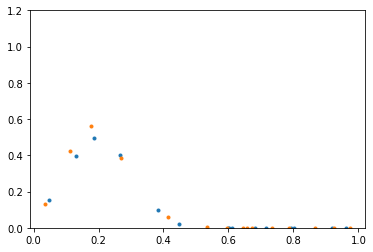

In [134]:
# [ v.name for v in h2.trainable_variables ]
def plot(xy):
    plt.figure('data')
    axes = plt.gca()
    axes.set_ylim([0,1.2])
    ax = plt.get
    x,y = tf.split(xy[0], num_or_size_splits=2)
    plt.plot(x,y,'.')
d = [x for x in ds.shuffle(100).batch(1).take(100)][0]
d0 = d[0][0]
y0 = h(d[0], training=False)
y0 = tf.sigmoid(y0[0][0])
# y0 = y0[0][0]
plot(d0)
plot(y0)

In [ ]:
# p = Hplt.LSPlotBokeh()
# p.set_model(h)
# p.set_data(, counts=1000)
# p.plot(notebook_url='http://172.17.0.2:8888')